In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#2 Load the dataset into the tool.
df=pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


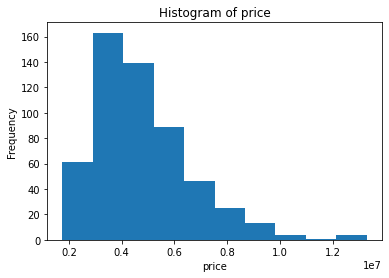

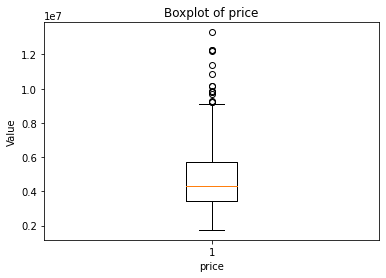

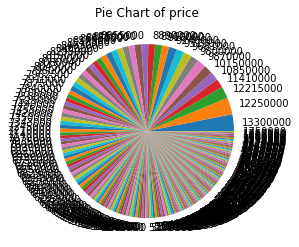

In [5]:
#3Perform Below Visualizations

#1. Univariate Analysis
plt.hist(df['price'], bins=10)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(df['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.ylabel('Value')
plt.show()

plt.pie(df['price'].value_counts(), labels=df['price'].unique())
plt.title('Pie Chart of price')
plt.show()

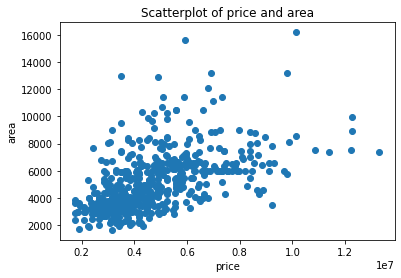

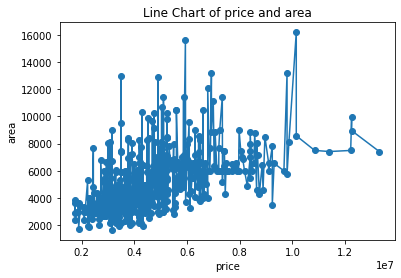

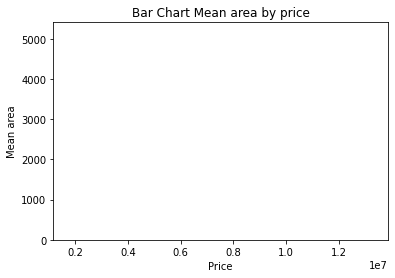

In [8]:
#2. Bivariate analysis
plt.scatter(df['price'], df['area'])
plt.title('Scatterplot of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

plt.plot(df['price'], df['area'], 'o-')
plt.title('Line Chart of price and area')
plt.xlabel('price')
plt.ylabel('area')
plt.show()

plt.bar(df['price'].unique(), df['area'].mean(), align='center')
plt.title('Bar Chart Mean area by price')
plt.xlabel('Price')
plt.ylabel('Mean area')
plt.show()

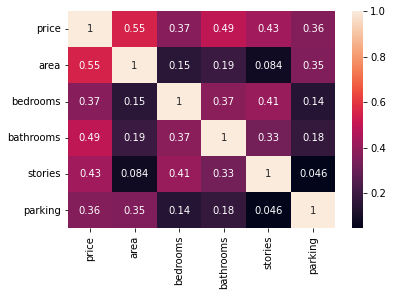

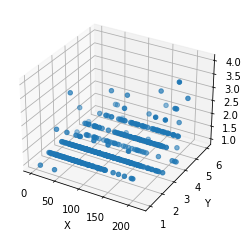

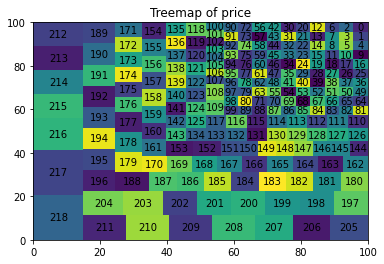

In [12]:
#3. Multivariate analysis
df['price'] = df['price'].astype('category').cat.codes
sns.heatmap(df.corr(), annot=True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
x = df['price']
y = df['bedrooms']
z = df['bathrooms']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

import squarify
plt.figure()
squarify.plot(df['price'].value_counts(), label=df['price'].unique())
plt.title('Treemap of price')
plt.show()

In [13]:
#4. Perform descriptive statistics on the dataset.
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,95.728440,5150.541284,2.965138,1.286239,1.805505,0.693578
std,56.256108,2170.141023,0.738064,0.502470,0.867492,0.861586
min,0.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,51.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,87.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,137.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,218.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
#5. Check for Missing values and deal with them.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [15]:
#6. Find the outliers and replace them outliers
target_column = 'price'
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

86.0


In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-78.0
266.0


In [17]:
outliers = df[(df[target_column] < lower_bound) | (df[target_column] > upper_bound)]
median_value = df[target_column].median()
df.loc[(df[target_column] < lower_bound) | (df[target_column] > upper_bound), target_column] = median_value
print(median_value)

87.0


In [18]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,218,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,217,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,217,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,216,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,215,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,0,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,0,2910,3,1,1,no,no,no,no,no,0,furnished


In [19]:
#7. Check for Categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder
df.dtypes

price                int16
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(categorical_columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


In [21]:
print(df_encoded)

     price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0      218  7420         4          2        3        2            0   
1      217  8960         4          4        4        3            0   
2      217  9960         3          2        2        2            0   
3      216  7500         4          2        2        3            0   
4      215  7420         4          1        2        2            0   
..     ...   ...       ...        ...      ...      ...          ...   
540      2  3000         2          1        1        2            0   
541      1  2400         3          1        1        0            1   
542      0  3620         2          1        1        0            0   
543      0  2910         3          1        1        0            1   
544      0  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0               1             1              0            

In [28]:
#8. Split the data into dependent and independent variables. 
dependent_variable = 'price'
independent_variables = df.drop(dependent_variable, axis=1)
dependent_variable = df[dependent_variable]

In [30]:
dependent_variable

0      218
1      217
2      217
3      216
4      215
      ... 
540      2
541      1
542      0
543      0
544      0
Name: price, Length: 545, dtype: int16

In [31]:
independent_variables

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,furnished


In [32]:
#9. Scale the independent variables
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['price', 'bedrooms', 'bathrooms', 'area', 'stories', 'parking']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,2.175477,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,furnished
1,2.157685,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,furnished
2,2.157685,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,semi-furnished
3,2.139893,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,furnished
4,2.122101,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.667633,-0.991879,-1.308863,-0.570187,-0.929397,yes,no,yes,no,no,1.517692,unfurnished
541,-1.685425,-1.268613,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,semi-furnished
542,-1.703217,-0.705921,-1.308863,-0.570187,-0.929397,yes,no,no,no,no,-0.805741,unfurnished
543,-1.703217,-1.033389,0.047278,-0.570187,-0.929397,no,no,no,no,no,-0.805741,furnished


In [33]:
#10.Split the data into training and testing
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)  
y = df['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,2.175477,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,0
1,2.157685,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,2.157685,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,2.139893,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,0
4,2.122101,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.667633,-0.991879,-1.308863,-0.570187,-0.929397,1,0,1,0,0,1.517692,2
541,-1.685425,-1.268613,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,1
542,-1.703217,-0.705921,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,2
543,-1.703217,-1.033389,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,0


In [39]:
#11. Build the Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df, df['price'], test_size=0.25)
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#12. Train the model
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.222909049578551e-31


In [42]:
#13. Test the model
y_pred = model.predict(X_test)

In [43]:
#14. Measure the performance using Metrics
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 6.775234773053212e-16
Mean Squared Error: 7.222909049578551e-31
Root Mean Squared Error: 8.498769940161077e-16
R-squared Score: 1.0
